In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
df = pd.read_csv('final_features.csv')
print(f"Feature Engineering EDA")
print(f"Dataset: {df.shape[0]} households × {df.shape[1]} features")
df.head()

Feature Engineering EDA
Dataset: 118 households × 26 features


,ICP_IDENTIFIER,num_rooms,baseload_kW,peak_kW,avg_power_kW,median_power_kW,std_power_kW,peak_to_avg_ratio,load_factor,coefficient_of_variation,...,morning_usage_ratio,daytime_usage_ratio,evening_usage_ratio,daily_usage_consistency,weekday_weekend_ratio,usage_concentration,time_analysis_days,avg_power_per_room,peak_power_per_room,power_variability_per_room
0,0000002795DE203,11,0.12,10.46,2.42,2.18,1.71,4.32,0.23,0.70,...,0.16,0.31,0.29,0.53,0.98,0.02,969,0.22,0.48,0.53
1,0000002805DE2EB,9,0.18,20.30,2.45,1.74,2.41,8.29,0.12,0.99,...,0.14,0.31,0.35,0.58,1.02,0.02,969,0.27,0.92,0.58
2,0000002806DEE2B,5,0.14,11.54,2.45,1.98,2.12,4.71,0.21,0.86,...,0.15,0.28,0.33,0.63,0.98,0.02,969,0.49,1.18,0.63
3,0000002807DE26E,4,0.12,10.38,1.96,1.48,1.79,5.29,0.19,0.91,...,0.14,0.31,0.31,0.71,1.04,0.02,949,0.49,1.22,0.71
4,0000002810DE509,4,0.00,9.86,1.13,0.66,1.40,8.70,0.11,1.23,...,0.16,0.28,0.27,0.94,1.06,0.02,969,0.28,0.84,0.94


In [4]:
print("DATA QUALITY ASSESSMENT")

# Basic info
print(f"Shape: {df.shape}")
print(f"Data types:")
print(df.dtypes.value_counts())

print(f"\nMissing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("No missing values found!")
else:
    print(missing[missing > 0])

print(f"\nRoom Distribution")
room_counts = df['num_rooms'].value_counts().sort_index()
print(room_counts)

DATA QUALITY ASSESSMENT
Shape: (118, 26)
Data types:
float64    22
int64       3
object      1
Name: count, dtype: int64

Missing Values:
No missing values found!

Room Distribution
num_rooms
1      2
2     13
3      8
4     24
5     37
6     31
7      1
9      1
11     1
Name: count, dtype: int64


FEATURE DISTRIBUTIONS
Found 25 numeric features


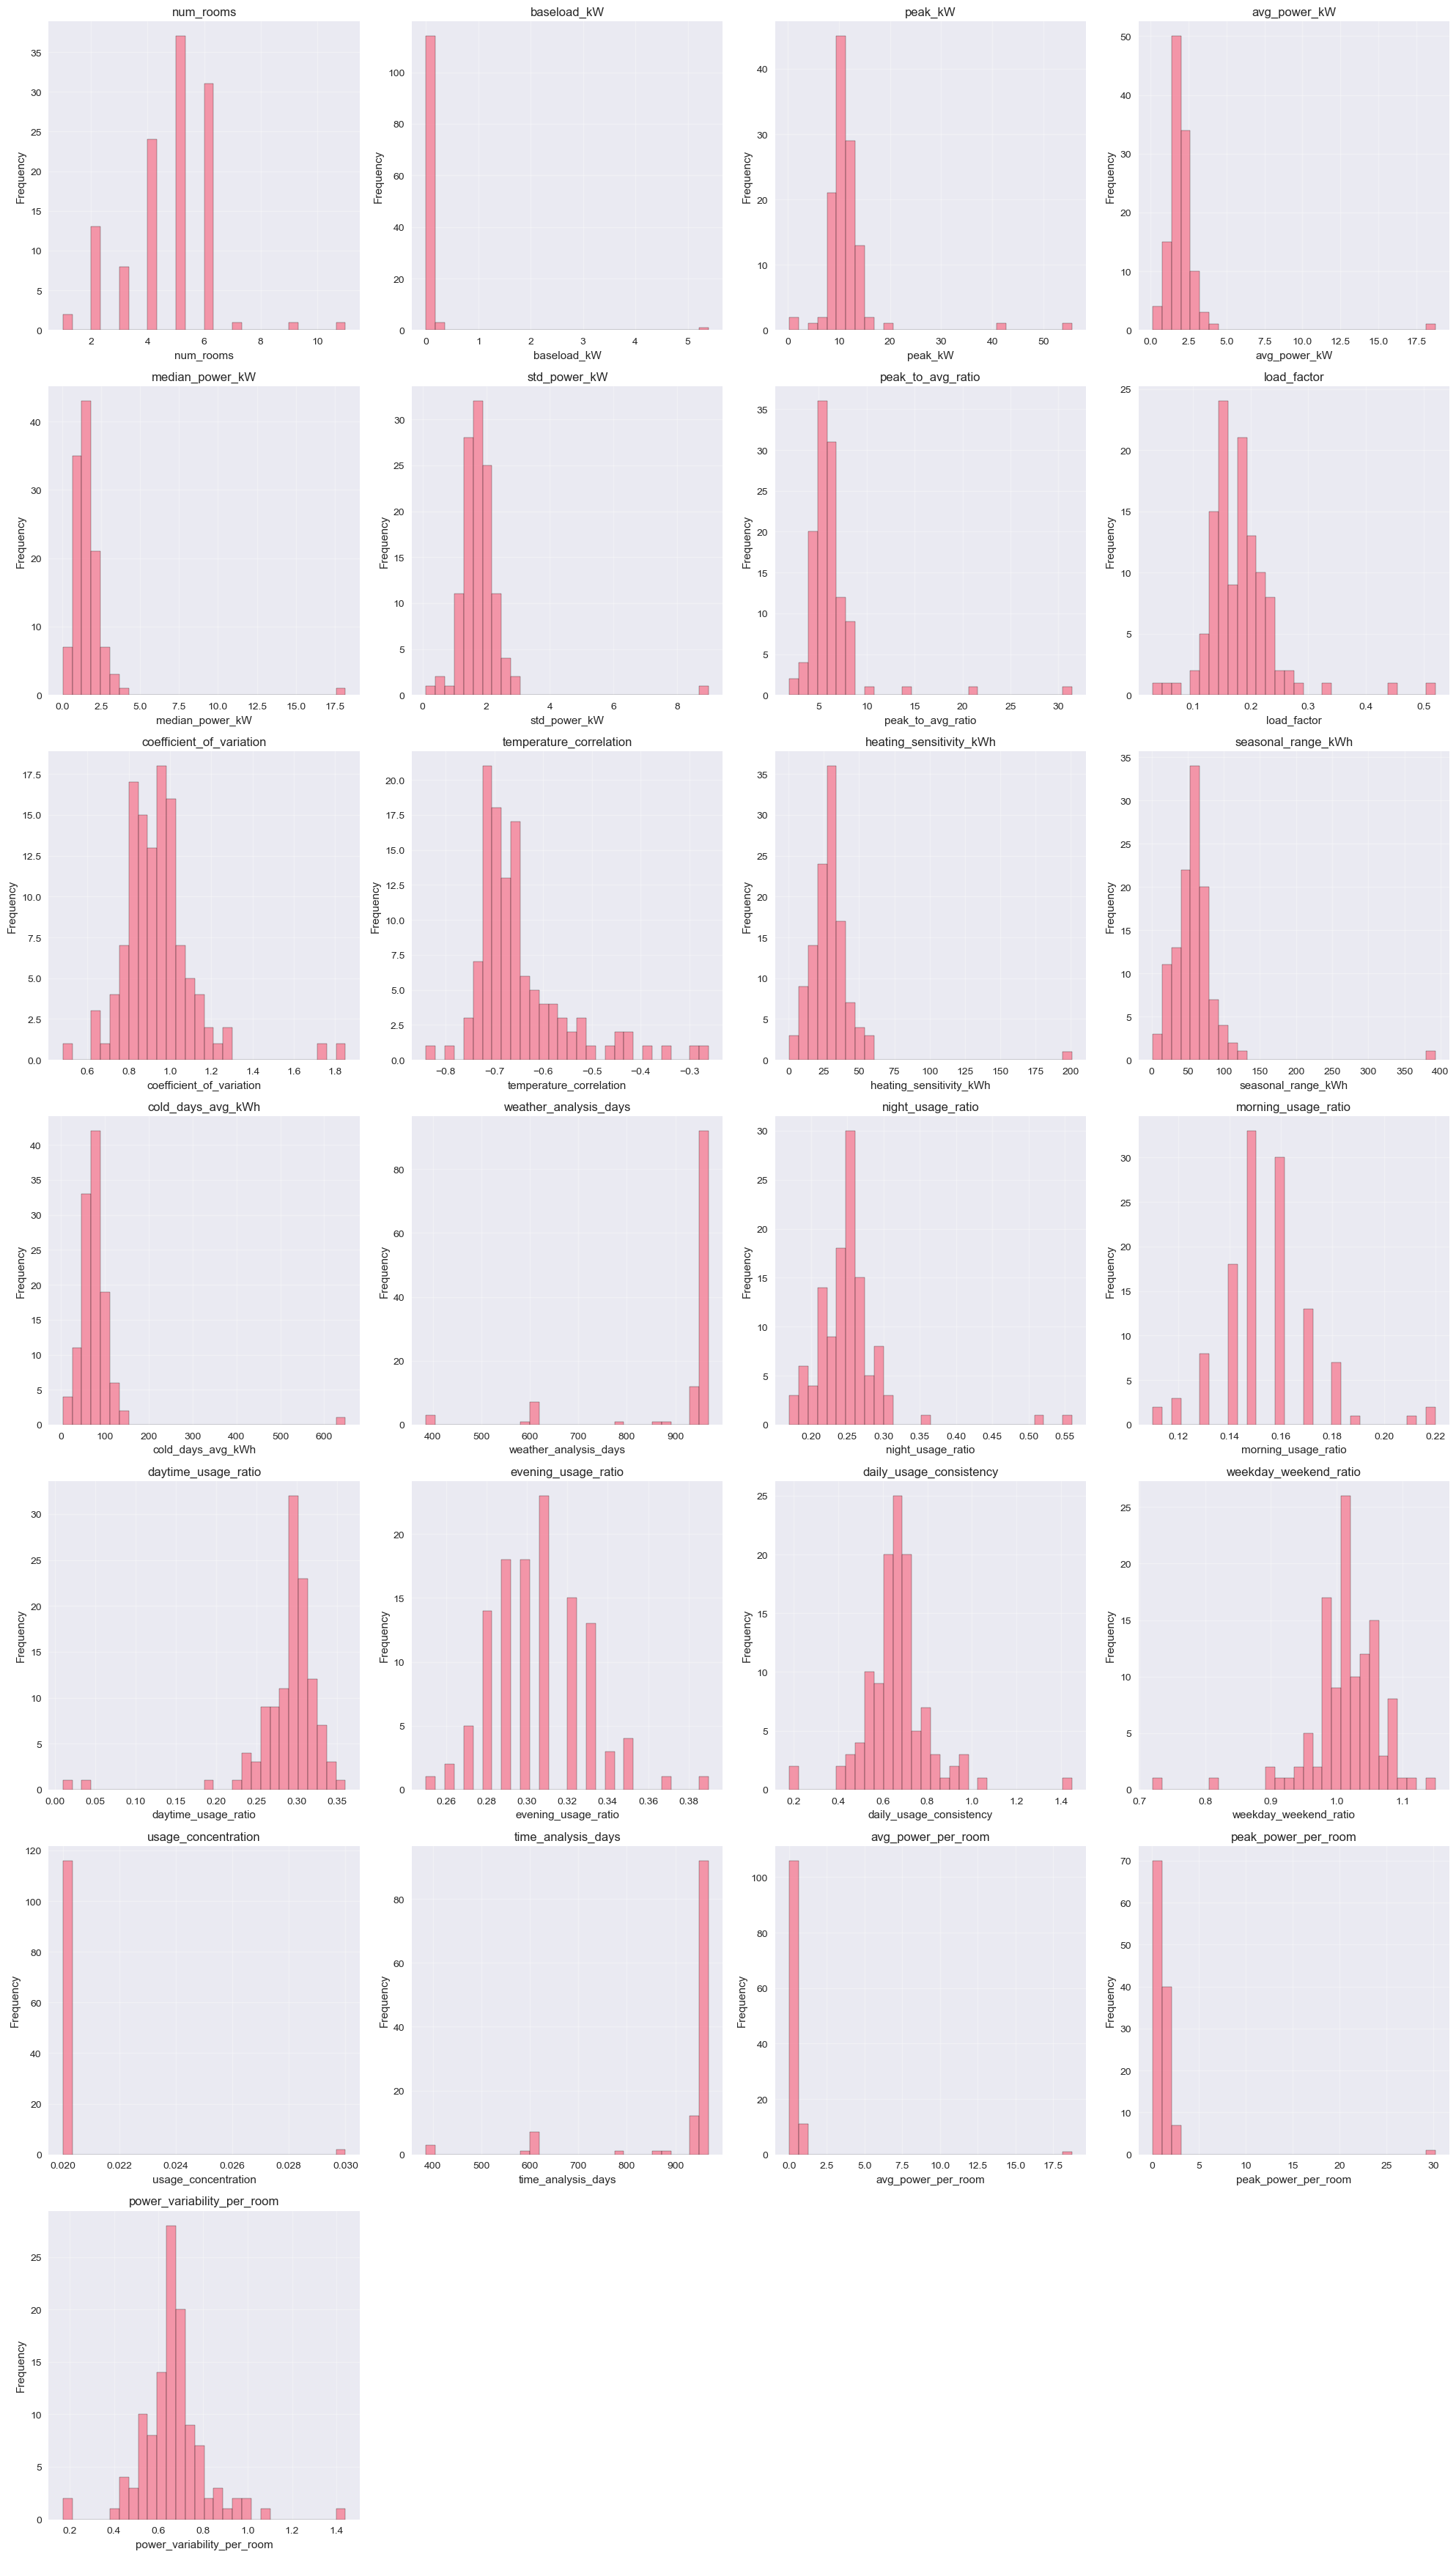

In [5]:
print("FEATURE DISTRIBUTIONS")

# Get numeric columns only (exclude ICP_IDENTIFIER)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Found {len(numeric_cols)} numeric features")

# Create distribution plots
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(20, 5 * n_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(df[col], bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

FEATURE CORRELATION ANALYSIS
Found 39 highly correlated feature pairs (|correlation| > 0.8):
  baseload_kW <-> avg_power_kW: 0.932
  baseload_kW <-> median_power_kW: 0.923
  baseload_kW <-> std_power_kW: 0.835
  baseload_kW <-> heating_sensitivity_kWh: 0.820
  baseload_kW <-> seasonal_range_kWh: 0.820
  baseload_kW <-> cold_days_avg_kWh: 0.907
  baseload_kW <-> avg_power_per_room: 0.995
  baseload_kW <-> peak_power_per_room: 0.987
  peak_kW <-> std_power_kW: 0.802
  avg_power_kW <-> median_power_kW: 0.992
  avg_power_kW <-> std_power_kW: 0.958
  avg_power_kW <-> heating_sensitivity_kWh: 0.949
  avg_power_kW <-> seasonal_range_kWh: 0.957
  avg_power_kW <-> cold_days_avg_kWh: 0.996
  avg_power_kW <-> avg_power_per_room: 0.935
  avg_power_kW <-> peak_power_per_room: 0.909
  median_power_kW <-> std_power_kW: 0.926
  median_power_kW <-> heating_sensitivity_kWh: 0.939
  median_power_kW <-> seasonal_range_kWh: 0.946
  median_power_kW <-> cold_days_avg_kWh: 0.987
  median_power_kW <-> avg_powe

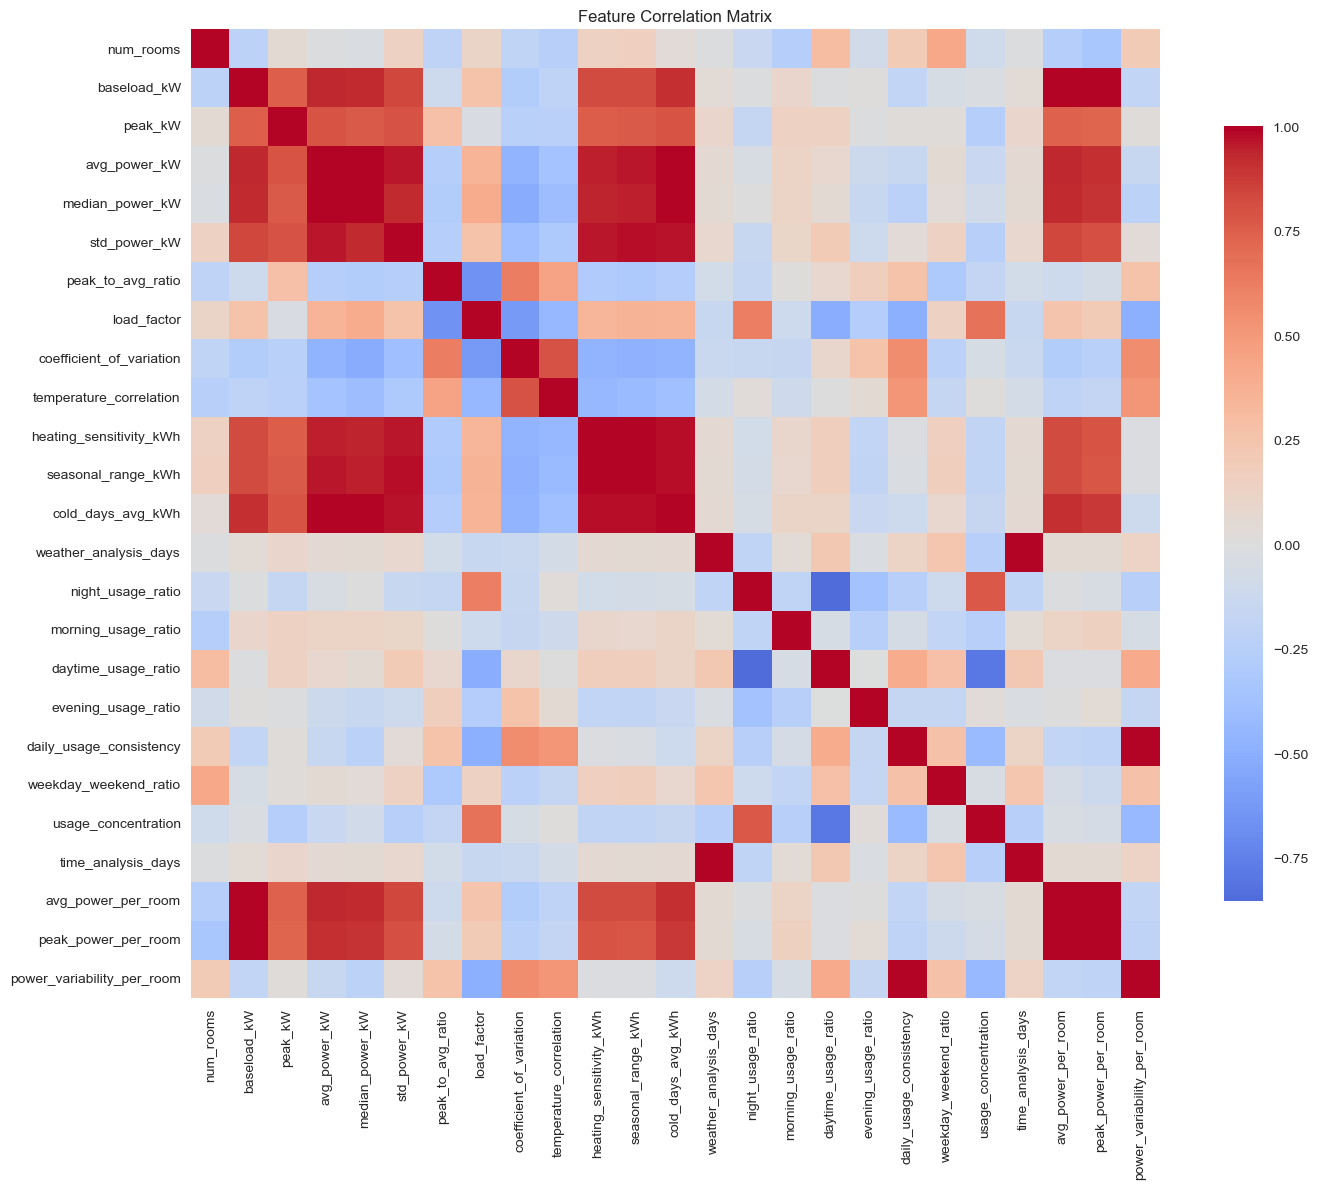

In [6]:
print("FEATURE CORRELATION ANALYSIS")

# Calculate correlation matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df[numeric_cols].corr()

# Find highly correlated pairs (> 0.8 or < -0.8)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.8:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

print(f"Found {len(high_corr_pairs)} highly correlated feature pairs (|correlation| > 0.8):")
for feat1, feat2, corr_val in high_corr_pairs:
    print(f"  {feat1} <-> {feat2}: {corr_val:.3f}")

# Plot correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [7]:
print("FINAL FEATURE SELECTION")

# Features to keep for clustering
final_features = [
    'num_rooms',
    'avg_power_kW',                    # Representative of power group
    'peak_kW',                         # Different from avg
    'peak_to_avg_ratio',               # Unique ratio feature
    'load_factor',                     # Unique efficiency metric
    'coefficient_of_variation',        # Usage variability
    'temperature_correlation',         # Weather relationship
    'heating_sensitivity_kWh',         # Representative of weather group
    'night_usage_ratio',               # Time patterns
    'morning_usage_ratio',
    'daytime_usage_ratio', 
    'evening_usage_ratio',
    'daily_usage_consistency',         # Keeping this over power_variability_per_room
    'weekday_weekend_ratio',
    'usage_concentration',
    'avg_power_per_room'               # Room-normalised power
]

print(f"SELECTED FEATURES ({len(final_features)}):")
for i, feat in enumerate(final_features, 1):
    print(f"{i:2d}. {feat}")

print(f"\nREDUCED FROM: 25 features")
print(f"TO: {len(final_features)} features")
print(f"REMOVED: {25 - len(final_features)} redundant features")

FINAL FEATURE SELECTION
SELECTED FEATURES (16):
 1. num_rooms
 2. avg_power_kW
 3. peak_kW
 4. peak_to_avg_ratio
 5. load_factor
 6. coefficient_of_variation
 7. temperature_correlation
 8. heating_sensitivity_kWh
 9. night_usage_ratio
10. morning_usage_ratio
11. daytime_usage_ratio
12. evening_usage_ratio
13. daily_usage_consistency
14. weekday_weekend_ratio
15. usage_concentration
16. avg_power_per_room

REDUCED FROM: 25 features
TO: 16 features
REMOVED: 9 redundant features


In [8]:
# Clean dataset for clustering
clustering_data = df[['ICP_IDENTIFIER'] + final_features].copy()

# Save for clustering notebook
clustering_data.to_csv('clustering_features.csv', index=False)

print("Clustering dataset created.")
print(f"File saved: clustering_features.csv")
print(f"Shape: {clustering_data.shape}")
print(f"Features: {len(final_features)}")

Clustering dataset created.
File saved: clustering_features.csv
Shape: (118, 17)
Features: 16
